# Cardiovascular Disease Prediction

## Overview

- the aim of the problem is to predict the presence or absence of a cardiovascular disease in a person based on given features
- our dataset provides following features:
    - age
    - height
    - weight
    - gender
    - smokes
    - consumes alkohol
    - physical activity
    - systolic blood pressure
    - diastolic blood pressure
    - cholesterol
    - glucose
    
| feature | type | name | datatype/unit |
| --- | --- | --- | --- |
| Age | objective feature | age | int (days) |
| Height | objective feature | height | int (cm) |
| Weight | objective feature | weight | float (kg) |
| Gender | objective feature | gender | categorical |
| Systolic Blood Pressure | examination feature | ap_hi | int |
| Diastolic Blood Pressure | examination feature | ap_lo | int |
| Cholesterol | examination feature | cholesterol | 1:normal<br>2:above normal<br>3:well above |
| Glucose | examination feature | gluc | 1:normal<br>2:above normale<br>3: well above |
| Smoking | subjective feature | smoke | binary |
| Alcohol Intake | subjectiv feature | alco | binary |
| Physical Activity | subjective feature | active | binary |
| Presence or Absence<br>of Cardiovascular Disease | Target Variable | cardio | binary |

- Objective: factual information
- Examination: results of medical examination
- Subjective: information given by the patient
<br>&nbsp;<br>


- notes on blood pressure:
    - blood pressure is represented by 2 numbers, systolic and diastolic (ideally 120/80 mm Hg)
    - the blood pressure is critical in assessing heart health
    - the first, higher number represents the systolic bp
    - the second, lower number represents the diastolic bp
    - systolic pressure indicates the bp in the arteries when the blood is pumped out of the heart
    - diastolic pressure indicated the bp between beats (at rest, filling up and ready to pump again)
    - if there numbers are high, that means that thea heart is exerting more effort to pump blood into the arteries
    
- notes on cholesterol:
    - cholesterol is a waxy material found in human blood
    - a normal level of cholesterol is necessary to ensure healthy cells but increasing levels will elevate risk of heart disease
    - this waxy material can block arteries and can result in strokes and heart attacks
    - a healthy lifestyle and regular exercise can reduce the risk of high cholesterol levels

- notes on glucose:
    - glucose represents the sugar the human body receives upon consuming food
    - glucose means 'sweet' in Greek
    - insulin hormone plays a key role in moving glucose from the blood to the cells for energy
    - diabetic patients have high glucose in their blood stream which could be due to two reasons:
        - they don't have enough insulin
        - the cells do not react to insulin in the proper way
        


## Import Libraries and Data

In [3]:
# import the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# import the csv file

df_cardio = pd.read_csv("cardio_train.csv", sep=';')
df_cardio.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


## Perform EDA

In [5]:
# we do not need ID

df_cardio = df_cardio.drop(columns="id")

In [6]:
# age in days is converted to years
df_cardio["age"] = round(df_cardio["age"]/365.25, 2)

In [8]:
df_cardio.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.36,2,168,62.0,110,80,1,1,0,0,1,0
1,55.38,1,156,85.0,140,90,3,1,0,0,1,1
2,51.63,1,165,64.0,130,70,3,1,0,0,0,1
3,48.25,2,169,82.0,150,100,1,1,0,0,1,1
4,47.84,1,156,56.0,100,60,1,1,0,0,0,0


In [9]:
# checking for null values:
df_cardio.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [10]:
df_cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  float64
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 6.4 MB


In [11]:
df_cardio.describe().T

,count,mean,std,min,25%,50%,75%,max
age,70000.0,53.302869,6.754974,29.56,48.36,53.94,58.39,64.92
gender,70000.0,1.349571,0.476838,1.00,1.00,1.00,2.00,2.00
height,70000.0,164.359229,8.210126,55.00,159.00,165.00,170.00,250.00
weight,70000.0,74.205690,14.395757,10.00,65.00,72.00,82.00,200.00
ap_hi,70000.0,128.817286,154.011419,-150.00,120.00,120.00,140.00,16020.00
ap_lo,70000.0,96.630414,188.472530,-70.00,80.00,80.00,90.00,11000.00
cholesterol,70000.0,1.366871,0.680250,1.00,1.00,1.00,2.00,3.00
gluc,70000.0,1.226457,0.572270,1.00,1.00,1.00,1.00,3.00
smoke,70000.0,0.088129,0.283484,0.00,0.00,0.00,0.00,1.00
alco,70000.0,0.053771,0.225568,0.00,0.00,0.00,0.00,1.00


#### Task:

- obtain the features of the individuals older than 64.8 years

In [13]:
df_cardio[df_cardio["age"] > 64.8]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
18062,64.82,1,140,48.0,170,100,2,1,0,0,1,1
20931,64.86,1,165,63.0,150,90,2,1,0,0,1,1
36603,64.85,2,163,55.0,120,80,3,1,1,0,1,1
37677,64.84,2,165,64.0,120,80,1,1,0,0,1,1
40099,64.83,1,165,74.0,120,80,1,1,0,0,1,0
50714,64.87,2,167,68.0,120,80,2,2,0,0,0,1
55533,64.81,1,160,60.0,120,80,1,1,0,0,1,1
57191,64.92,2,175,75.0,120,80,1,1,0,0,1,1
57853,64.82,1,165,65.0,130,80,1,1,0,0,1,1
59784,64.81,2,170,68.0,110,80,2,2,0,0,0,1


## Visualization

#### Tasks:
- plot the histogram for all features (20 bins)
- plot the correlation matrix and indicate if there is any correlation between features

##### Feature Histograms

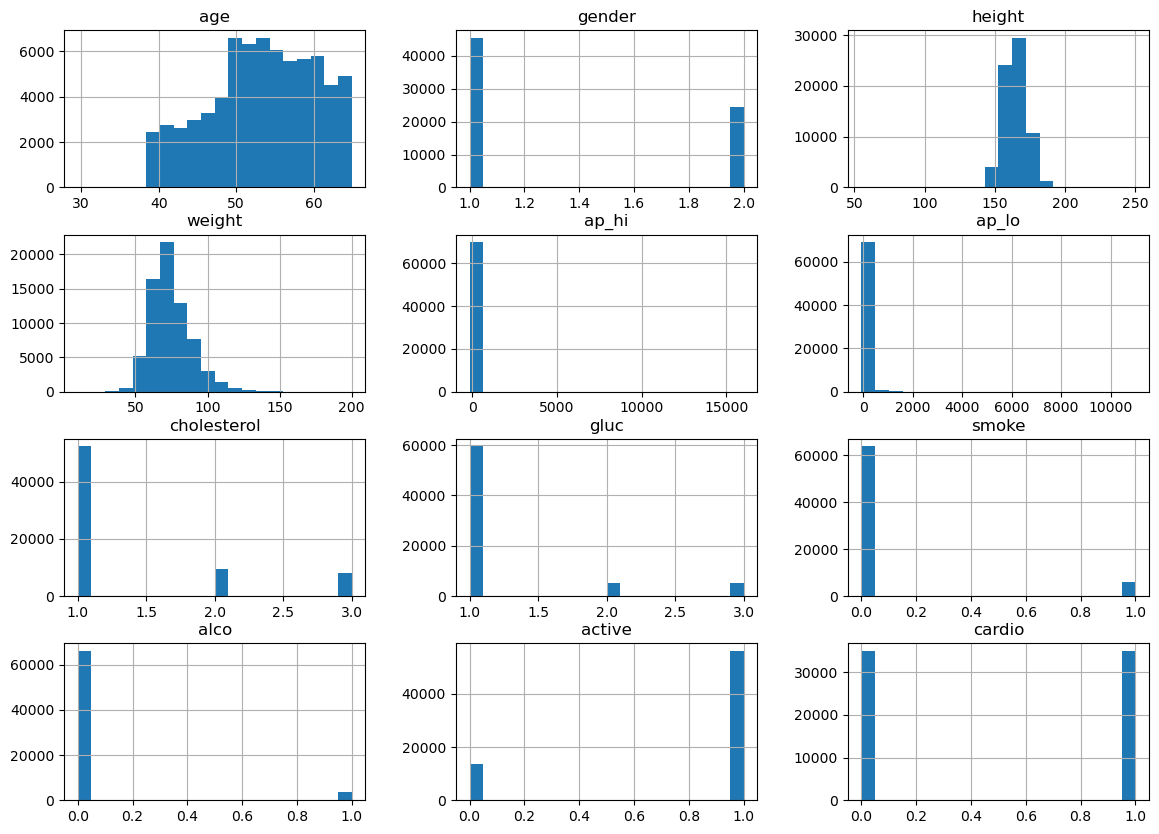

In [23]:
df_cardio.hist(bins=20, figsize=(14, 10));

##### Correlation Matrix

In [16]:
df_corr = df_cardio.drop("cardio", axis=1).corr()

<AxesSubplot:>

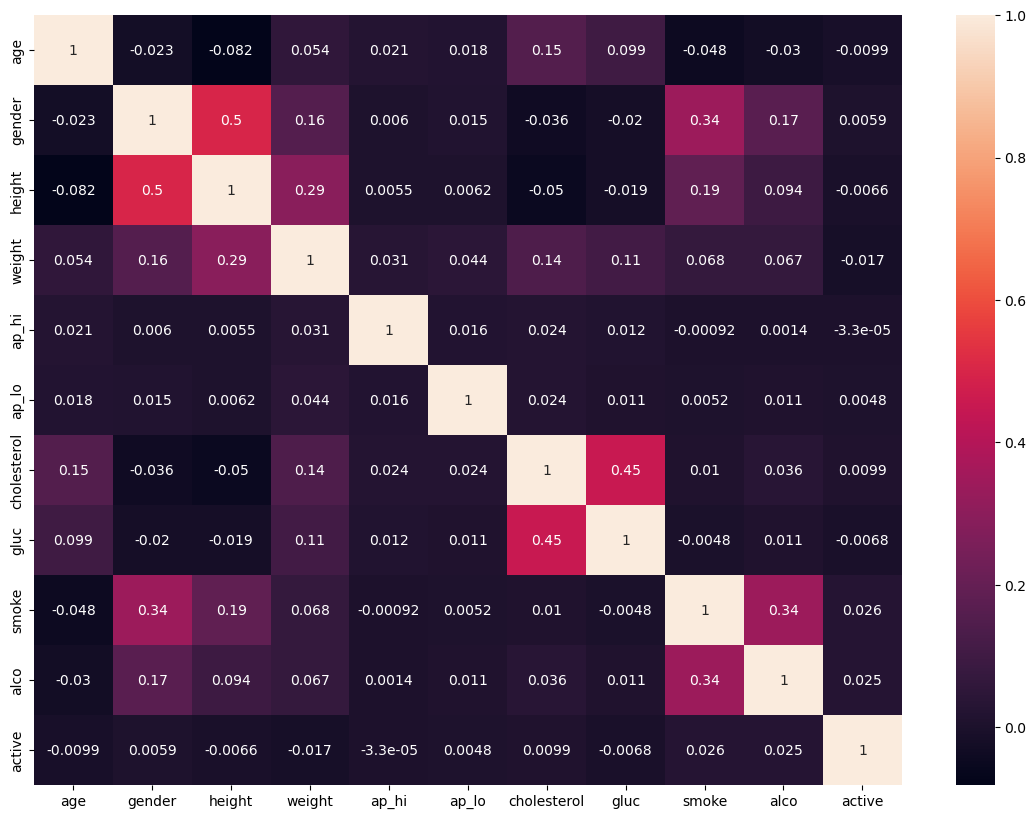

In [25]:
plt.figure(figsize=(14,10))
sns.heatmap(df_corr, annot=True)

There seems to be a correlation between gender and height, as well as glucose and cholesterol.
Futher, there seems to be a correlation between smoke and gender, as well as alcohol intake and smoking.

##### Pairplots

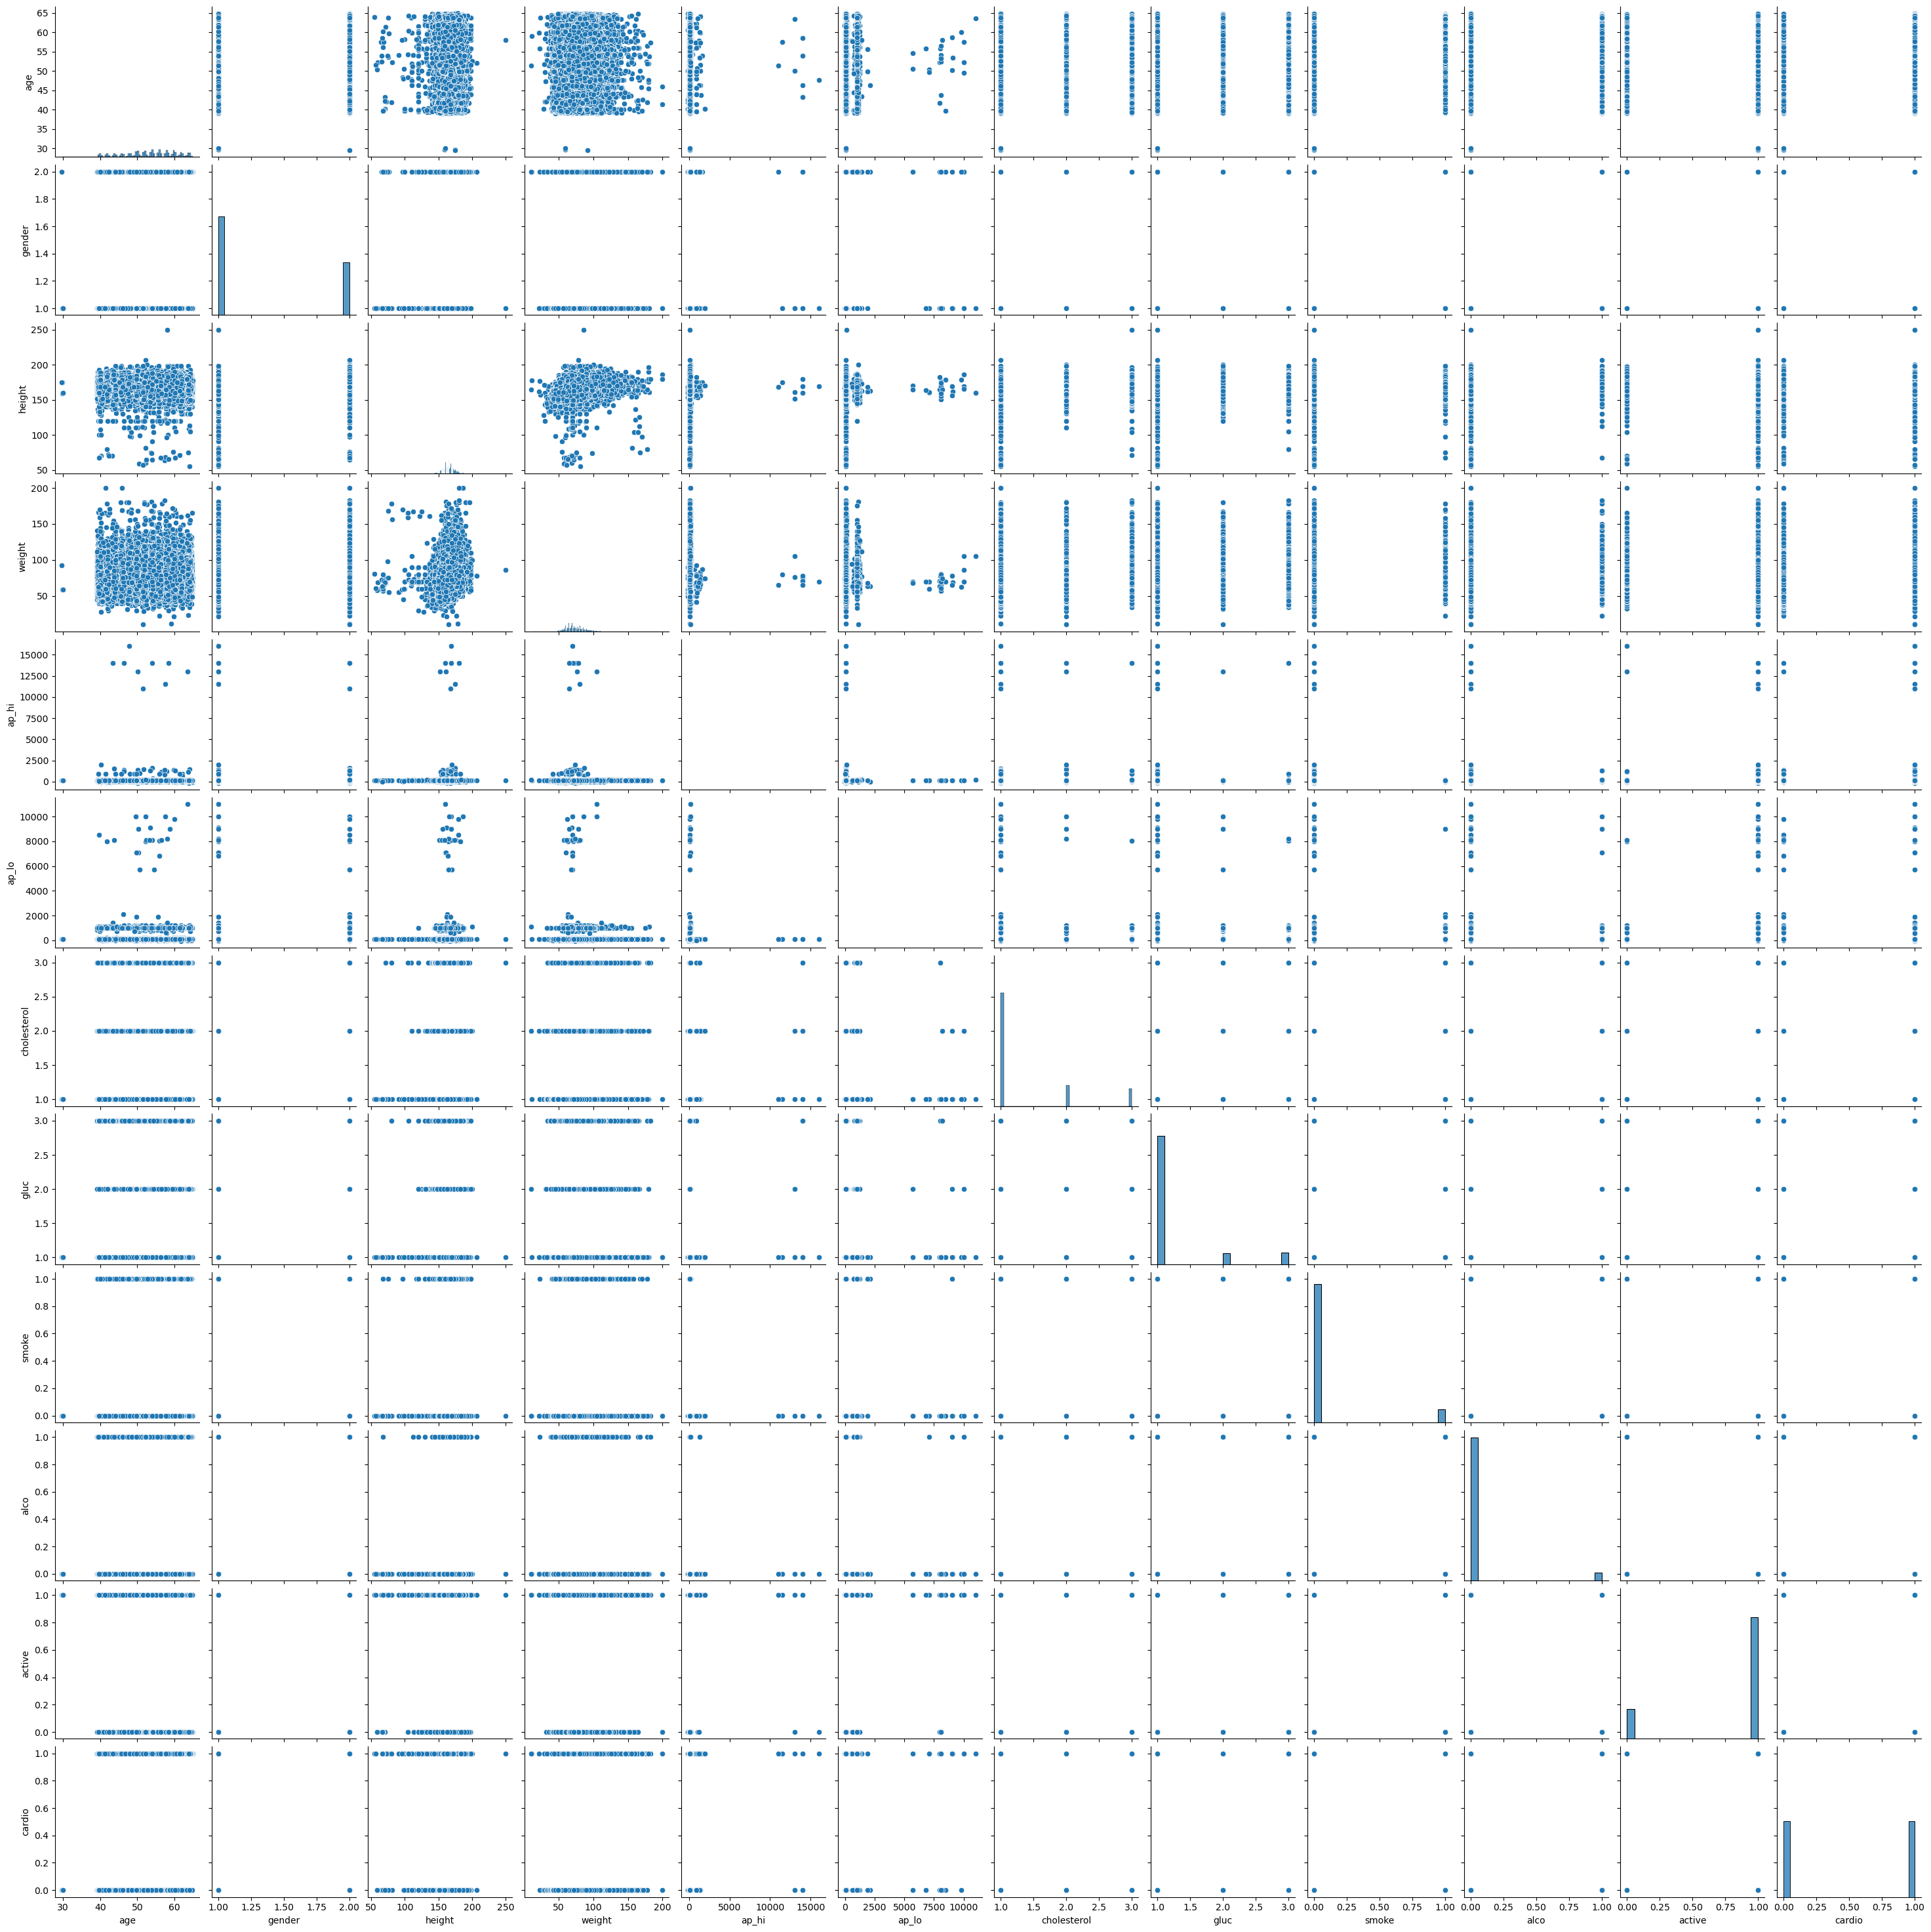

In [26]:
sns.pairplot(df_cardio);

## Create Training And Testing Datasets

In [27]:
X = df_cardio.drop("cardio", axis=1)
y = df_cardio["cardio"]

In [28]:
X.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active'],
      dtype='object')

In [29]:
df_cardio.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [30]:
X.shape

(70000, 11)

In [31]:
y.shape

(70000,)

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((56000, 11), (56000,), (14000, 11), (14000,))

## Train And Test XGBoost Model in Local Mode

In [34]:
!pip install xgboost

**Note**:
- we have not performed any normalization or scaling since XGBoost is not sensitive to this.
- XGBoost works by selecting thresholds or cut points on features to split a node
- thus, feature scaling does not matter

In [36]:
# use XGBoost in local mode

from xgboost import XGBClassifier

model = XGBClassifier()

model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [37]:
preds = model.predict(X_test)
preds

array([1, 1, 1, ..., 0, 1, 1])

## Assessment

Let's assess model performance on the training dataset

In [38]:
train_preds = model.predict(X_train)

### Confusion Matrix Training performance

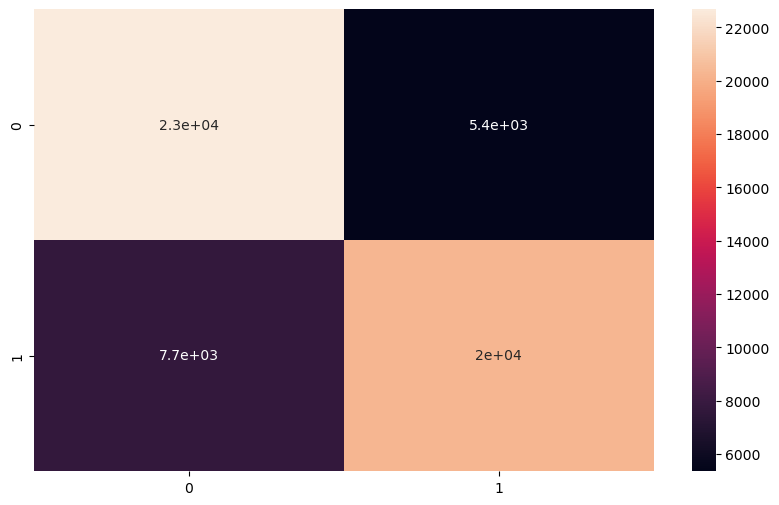

In [40]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train, train_preds)
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True);

### Confusion Matrix Test Performance

<AxesSubplot:>

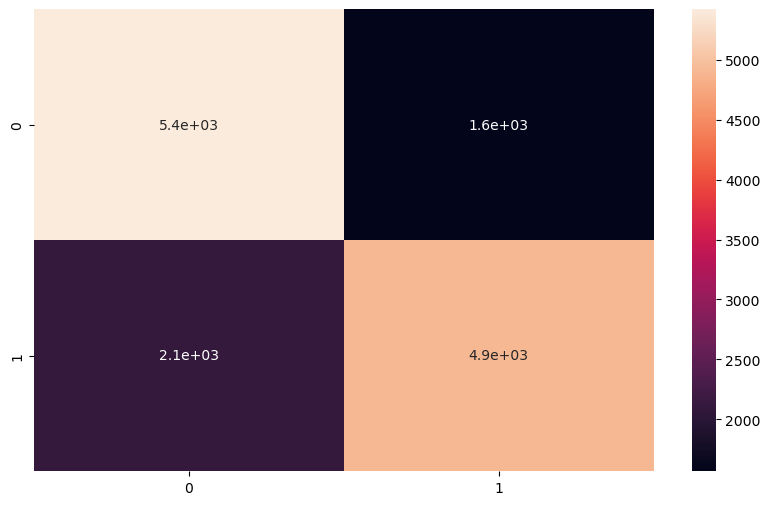

In [43]:
# confusion matrix for test prediction results
test_cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(10,6))
sns.heatmap(test_cm, annot=True)

### Evaluation

In [46]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

def eval_preds(y_preds, y_true, cat="Testing"):
    res_acc = accuracy_score(y_true, y_preds)
    res_prec = precision_score(y_true, y_preds)
    res_recall = recall_score(y_true, y_preds)
    print(f"{cat} data performance:\nAccuracy: {res_acc}\nPrecision: {res_prec}\nRecall: {res_recall}\n")
    return res_acc, res_prec, res_recall

In [48]:
eval_preds(train_preds, y_train, "Training")
eval_preds(preds, y_test)

Training data performance:
Accuracy: 0.7667321428571429
Precision: 0.7909800859039438
Recall: 0.7243179461508206

Testing data performance:
Accuracy: 0.7375
Precision: 0.7578426827383712
Recall: 0.6993725042783799



(0.7375, 0.7578426827383712, 0.6993725042783799)

#### Tasks:
- retrain the XGBoost algorithm with a large number of estimators (n_estimators=500) and more depth (max_depth=20)
- comment on the accuracy for both the training and testing data
- attempt to tune the XGBoost Classifier using gridsearch utilizing param_grid below<br><br>

further resources: https://towardsdatascience.com/fine-tuning-xgboost-in-python-like-a-boss-b4543ed8b1e

In [51]:
param_grid = {
    'gamma': [0.5, 1, 5],                  # regularization parameter
    'subsample': [0.6, 0.8, 1.0],          # % of rows taken to build each tree
    'colsample_bytree': [0.6, 0.8, 1.0],   # number of columns used by each tree
    'max_depth': [3, 4, 5],                # depth of each tree
}

In [44]:
model_1 = XGBClassifier(n_estimators=500, max_depth=20)
model_1.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=20, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [45]:
preds_1 = model_1.predict(X_test)
train_preds_1 = model_1.predict(X_train)

In [49]:
train1_acc, train1_prec, train1_rec = eval_preds(train_preds_1, y_train, "Training")
test1_acc, test1_prec, test1_rec = eval_preds(preds_1, y_test)

Training data performance:
Accuracy: 0.9992678571428572
Precision: 0.9997136926490587
Recall: 0.9988200379018128

Testing data performance:
Accuracy: 0.6929285714285714
Precision: 0.6921660291826037
Recall: 0.6968054763262977



Compared to the previous result, while the training data performance increased by a great margin, the testing data performance actually dropped somewhat, indicating an overfitting issue.

In [52]:
from sklearn.model_selection import GridSearchCV

estimator = XGBClassifier()
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=param_grid,
    scoring='roc_auc', 
    n_jobs=10, 
    cv=5, 
    verbose=True
)

In [53]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                   

In [55]:
grid_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=5, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [56]:
y_pred_best = grid_search.predict(X_test)
y_pred_best

array([1, 1, 1, ..., 1, 1, 1])

In [57]:
eval_preds(y_pred_best, y_test)

Testing data performance:
Accuracy: 0.7387142857142858
Precision: 0.7604846225535881
Recall: 0.6982316029663435



(0.7387142857142858, 0.7604846225535881, 0.6982316029663435)

## Dimensionality Reduction Using PCA (Utilizing SageMaker)

### Prepwork

In [60]:
import boto3
import sagemaker as sm

sm_session = sm.Session()
bucket = 'ikm-sagemaker-practical1'
prefix = 'pca'  # prefix is the subfolder within the bucket

role = sm.get_execution_role()

In [61]:
import io        # the io module allows for dealing with various types of I/O (text, binary, raw)
import sagemaker.amazon.common as smac     # sagemaker common library

The following code converts the data in numpy array format to RecordIO format

The RecordIO format is required by SageMaker's PCA algorithm

In [62]:
# create an in-memory byte array (buf is the buffer we'll be writing to)
buf = io.BytesIO()

# convert the dataframe into a 2D array
df_matrix = X.to_numpy()

smac.write_numpy_to_dense_tensor(buf, df_matrix)

# buf needs to be reset to zero as it increments by 1 every time it is written into
buf.seek(0)

0

Next, the RecordIO data needs to be uploaded to S3

In [64]:
import os

# key refers to the name of the file
key = 'pca'

# following code uploads the data in recordIO format to the S3 bucket to be accessed later for training
boto3.resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'train', key)).upload_fileobj(buf)

# training data location in S3
s3_train_data = f"s3://{bucket}/{prefix}/train/{key}"
print(f"training data location: {s3_train_data}")

training data location: s3://ikm-sagemaker-practical1/pca/train/pca


Next to create the output location placeholder

In [66]:
output_location = f"s3://{bucket}/{prefix}/output"
print(f"training artifacts will be uploaded to: {output_location}")

training artifacts will be uploaded to: s3://ikm-sagemaker-practical1/pca/output


The training container of SageMaker's built-in algorithm needs to be accessed to retrieve the PCA model from it.

In [68]:
container = sm.image_uris.retrieve('pca', boto3.Session().region_name)

In [70]:
pca = sm.estimator.Estimator(container,
                                    role,
                                    instance_count=1,
                                    instance_type='ml.m5.large',
                                    output_path=output_location,
                                    sagemaker_session=sm_session,
                                    use_spot_instances=True,
                                    max_run=400,
                                    max_wait=600)

pca.set_hyperparameters(feature_dim=11,
                        num_components=6,
                        subtract_mean=False,
                        algorithm_mode='regular',
                        mini_batch_size=100)

In [71]:
pca.fit({'train': s3_train_data})

INFO:sagemaker:Creating training-job with name: pca-2023-08-21-00-38-59-464


2023-08-21 00:38:59 Starting - Starting the training job...
2023-08-21 00:39:16 Starting - Preparing the instances for training......
2023-08-21 00:40:04 Downloading - Downloading input data...
2023-08-21 00:40:34 Training - Downloading the training image......
2023-08-21 00:41:55 Uploading - Uploading generated training modelDocker entrypoint called with argument(s): train
Running default environment configuration script
[08/21/2023 00:41:48 INFO 140344891365184] Reading default configuration from /opt/amazon/lib/python3.7/site-packages/algorithm/resources/default-conf.json: {'algorithm_mode': 'regular', 'subtract_mean': 'true', 'extra_components': '-1', 'force_dense': 'true', 'epochs': 1, '_log_level': 'info', '_kvstore': 'dist_sync', '_num_kv_servers': 'auto', '_num_gpus': 'auto'}
[08/21/2023 00:41:48 INFO 140344891365184] Merging with provided configuration from /opt/ml/input/config/hyperparameters.json: {'algorithm_mode': 'regular', 'feature_dim': '11', 'mini_batch_size': '100', '

## Deploy The Trained PCA Model

In [72]:
pca_reduction = pca.deploy(initial_instance_count=1, instance_type='ml.m5.large')

INFO:sagemaker:Creating model with name: pca-2023-08-21-00-48-21-893
INFO:sagemaker:Creating endpoint-config with name pca-2023-08-21-00-48-21-893
INFO:sagemaker:Creating endpoint with name pca-2023-08-21-00-48-21-893


------!

Content Type roverrides the data that will be passed to the deployed model, since the deployed model expects the data in text/csv format.<br>
- Serializer accepts a single argument, the input data, and returns a sequence of bytes in the specified content type
- Deserializer accepts two arguments - the result data and the response content type - and returns a sequence of bytes in the specified content type

reference: https://sagemaker.readthedocs.io/en/stable/api/inference/predictors.html

In [73]:
from sagemaker.serializers import CSVSerializer
from sagemaker.deserializers import JSONDeserializer

pca_reduction.serializer = CSVSerializer()
pca_reduction.deserializer = JSONDeserializer()

In [74]:
result = pca_reduction.predict(np.array(X))
result # in json format

{'projections': [{'projection': [-0.28915488719940186,
    3.9880495071411133,
    -12.55089282989502,
    64.2422103881836,
    36.82138442993164,
    -217.84022521972656]},
  {'projection': [1.095718264579773,
    -4.772521018981934,
    12.36567497253418,
    44.58234405517578,
    45.666770935058594,
    -241.01600646972656]},
  {'projection': [1.3366295099258423,
    1.7953510284423828,
    -9.73655891418457,
    53.42652893066406,
    55.75442886352539,
    -223.0085906982422]},
  {'projection': [-0.4163914918899536,
    6.14553689956665,
    5.680255889892578,
    43.04616165161133,
    45.01115036010742,
    -257.23638916015625]},
  {'projection': [-0.1497802734375,
    2.673142910003662,
    -13.210286140441895,
    63.61114501953125,
    44.34642028808594,
    -192.79086303710938]},
  {'projection': [0.8929284811019897,
    -10.54453182220459,
    -2.8923912048339844,
    50.405303955078125,
    40.301055908203125,
    -217.7454376220703]},
  {'projection': [0.922603964805603

In [76]:
predictions = np.array([r['projection'] for r in result['projections']])
predictions

array([[-2.89154887e-01,  3.98804951e+00, -1.25508928e+01,
         6.42422104e+01,  3.68213844e+01, -2.17840225e+02],
       [ 1.09571826e+00, -4.77252102e+00,  1.23656750e+01,
         4.45823441e+01,  4.56667709e+01, -2.41016006e+02],
       [ 1.33662951e+00,  1.79535103e+00, -9.73655891e+00,
         5.34265289e+01,  5.57544289e+01, -2.23008591e+02],
       ...,
       [ 9.36115801e-01,  6.49922895e+00,  2.10823917e+01,
         4.50966988e+01,  7.45708771e+01, -2.82256287e+02],
       [ 1.19709969e-03, -8.16704464e+00, -2.96926212e+00,
         5.16750832e+01,  5.14332047e+01, -2.34013901e+02],
       [ 3.68813157e-01, -1.10057294e+00, -4.88966322e+00,
         6.41329575e+01,  4.39793053e+01, -2.27993378e+02]])

In [77]:
predictions.shape

(70000, 6)

In [78]:
pca_reduction.delete_endpoint()

INFO:sagemaker:Deleting endpoint configuration with name: pca-2023-08-21-00-48-21-893
INFO:sagemaker:Deleting endpoint with name: pca-2023-08-21-00-48-21-893


## Train And Evaluate XGBoost Model On PCA-modified Data 

In [80]:
train_data = pd.DataFrame({'Target': y})
train_data

,Target
0,0
1,1
2,1
3,1
4,0
...,...
69995,0
69996,1
69997,1
69998,1


In [81]:
for i in range(predictions.shape[1]):
    train_data[i] = predictions[:, i]
train_data.head(3)

,Target,0,1,2,3,4,5
0,0,-0.289155,3.988050,-12.550893,64.242210,36.821384,-217.840225
1,1,1.095718,-4.772521,12.365675,44.582344,45.666771,-241.016006
2,1,1.336630,1.795351,-9.736559,53.426529,55.754429,-223.008591


In [85]:
train_data_size = int(0.8 * train_data.shape[0])

rest_size = int((len(train_data)-train_data_size)/2)

train_data_size, rest_size

(56000, 7000)

In [86]:
from sklearn.utils import shuffle
train_data_shuffled = shuffle(train_data)

train, test, valid = train_data_shuffled[:train_data_size], train_data_shuffled[train_data_size:train_data_size+rest_size], train_data_shuffled[train_data_size+rest_size:]

In [87]:
train.shape, test.shape, valid.shape

((56000, 7), (7000, 7), (7000, 7))

In [88]:
X_test = test.drop('Target', axis=1)
y_test = test["Target"]

In [89]:
train.to_csv('train.csv', header=False, index=False)
valid.to_csv('valid.csv', header=False, index=False)

In [90]:
prefix = 'XGBoost-Classifier'
key = 'XGBoost-Classifier'

In [92]:
with open('train.csv', 'rb') as f:
    boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'train', key)).upload_fileobj(f)

s3_train_data = f's3://{bucket}/{prefix}/train/{key}'
print(f'training data uploaded to: {s3_train_data}')

training data uploaded to: s3://ikm-sagemaker-practical1/XGBoost-Classifier/train/XGBoost-Classifier


In [93]:
with open('valid.csv', 'rb') as f:
    boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'valid', key)).upload_fileobj(f)
    
s3_val_data = f"s3://{bucket}/{prefix}/valid/{key}"
print(f"validation data uploaded to: {s3_val_data}")

validation data uploaded to: s3://ikm-sagemaker-practical1/XGBoost-Classifier/valid/XGBoost-Classifier


In [94]:
output_loc = f's3://{bucket}/{prefix}/output'
print(f"training artifacts will be uploaded to {output_loc}")

training artifacts will be uploaded to s3://ikm-sagemaker-practical1/XGBoost-Classifier/output


In [97]:
container = sm.image_uris.retrieve('xgboost', boto3.Session().region_name, '1.7-1')

INFO:sagemaker.image_uris:Ignoring unnecessary instance type: None.


In [98]:
xgb_classifier = sm.estimator.Estimator(container,
                                        role,
                                        instance_count=1,
                                        instance_type='ml.m5.large',
                                        output_path=output_loc, 
                                        sagemaker_session=sm_session,
                                        use_spot_instances=True,
                                        max_wait=1000,
                                        max_run=500)

xgb_classifier.set_hyperparameters(max_depth=3,
                                   objective='multi:softmax',
                                   num_class=2,
                                   eta=0.5,
                                   num_round=150)

In [101]:
train_input = sm.inputs.TrainingInput(s3_data = s3_train_data, content_type='csv', s3_data_type='S3Prefix')
val_input = sm.inputs.TrainingInput(s3_data = s3_val_data, content_type='csv', s3_data_type='S3Prefix')

In [102]:
xgb_classifier.fit({'train': train_input, 'validation': val_input})

INFO:sagemaker:Creating training-job with name: sagemaker-xgboost-2023-08-21-01-24-45-280


2023-08-21 01:24:45 Starting - Starting the training job...
2023-08-21 01:25:00 Starting - Preparing the instances for training......
2023-08-21 01:25:52 Downloading - Downloading input data...
2023-08-21 01:26:32 Training - Downloading the training image...
2023-08-21 01:27:13 Training - Training image download completed. Training in progress...[2023-08-21 01:27:18.505 ip-10-0-80-239.eu-central-1.compute.internal:7 INFO utils.py:28] RULE_JOB_STOP_SIGNAL_FILENAME: None
[2023-08-21 01:27:18.540 ip-10-0-80-239.eu-central-1.compute.internal:7 INFO profiler_config_parser.py:111] User has disabled profiler.
[2023-08-21:01:27:18:INFO] Imported framework sagemaker_xgboost_container.training
[2023-08-21:01:27:18:INFO] Failed to parse hyperparameter objective value multi:softmax to Json.
Returning the value itself
[2023-08-21:01:27:18:INFO] No GPUs detected (normal if no gpus installed)
[2023-08-21:01:27:18:INFO] Running XGBoost Sagemaker in algorithm mode
[2023-08-21:01:27:18:INFO] Determined 

In [103]:
grid_search.best_params_

{'colsample_bytree': 0.6, 'gamma': 5, 'max_depth': 4, 'subsample': 1.0}

In [106]:
container = sm.image_uris.retrieve('xgboost', boto3.Session().region_name, 'latest')

xgb2 = sm.estimator.Estimator(container,
                             role,
                             instance_count=1,
                             instance_type='ml.m5.large',
                             output_path=output_loc,
                             sagemaker_session=sm_session,
                             use_spot_instances=True,
                             max_wait=1200,
                             max_run=800)

xgb2.set_hyperparameters(max_depth=4,
                         objective='multi:softmax',
                         num_class=2,
                         eta=0.5,
                         num_round=150,
                         colsample_bytree=0.6,
                         gamma=5,
                         subsample=1.0)

INFO:sagemaker.image_uris:Ignoring unnecessary instance type: None.


In [108]:
xgb2.fit({'train': train_input, 'validation': val_input})

INFO:sagemaker:Creating training-job with name: xgboost-2023-08-21-01-32-24-813


2023-08-21 01:32:24 Starting - Starting the training job...
2023-08-21 01:32:40 Starting - Preparing the instances for training......
2023-08-21 01:33:31 Downloading - Downloading input data...
2023-08-21 01:34:12 Training - Downloading the training image...
2023-08-21 01:34:47 Training - Training image download completed. Training in progress..Arguments: train
[2023-08-21:01:34:52:INFO] Running standalone xgboost training.
[2023-08-21:01:34:52:INFO] File size need to be processed in the node: 6.95mb. Available memory size in the node: 306.94mb
[2023-08-21:01:34:52:INFO] Determined delimiter of CSV input is ','
[01:34:52] S3DistributionType set as FullyReplicated
[01:34:52] 56000x6 matrix with 336000 entries loaded from /opt/ml/input/data/train?format=csv&label_column=0&delimiter=,
[2023-08-21:01:34:52:INFO] Determined delimiter of CSV input is ','
[01:34:52] S3DistributionType set as FullyReplicated
[01:34:52] 7000x6 matrix with 42000 entries loaded from /opt/ml/input/data/validation?

## Deploy And Test Trained XGBoost Model

In [110]:
xgb2 = xgb2.deploy(initial_instance_count=1, instance_type='ml.m5.large')

INFO:sagemaker:Creating model with name: xgboost-2023-08-21-02-01-15-832
INFO:sagemaker:Creating endpoint-config with name xgboost-2023-08-21-02-01-15-832
INFO:sagemaker:Creating endpoint with name xgboost-2023-08-21-02-01-15-832


----!

In [111]:
xgb2.serializer = CSVSerializer()

In [112]:
xgb2_preds = xgb2.predict(np.array(X_test))

In [113]:
xgb2_preds

b'1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.

The prediction is in byte format and needs to be converted, we'll create a function for it

In [121]:
def bytes_to_array(x):
    # turns entire prediction into a string and splits it based on ','
    x = str(x).split(',')
    
    # removal of unwanted characters like (b and ') in first element
    x[0] = x[0][2:]
    # removal of unwanted characters in last element
    x[-1] = x[-1][:-1]
    
    # convert everything to float
    x = list(map(float, x))
    
    # convert to np array
    x = np.array(x).astype(np.float32)
    
    # return reshaped array
    return x.reshape(-1, 1)

In [122]:
pred_vals = bytes_to_array(xgb2_preds)
pred_vals

array([[1.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [0.]], dtype=float32)

In [123]:
y_test = np.array(y_test)
y_test = y_test.reshape(-1,1)
y_test

array([[1],
       [0],
       [0],
       ...,
       [1],
       [0],
       [1]])

In [124]:
eval_preds(pred_vals, y_test)

Testing data performance:
Accuracy: 0.7342857142857143
Precision: 0.753650201926064
Recall: 0.6945319209848267



(0.7342857142857143, 0.753650201926064, 0.6945319209848267)

<AxesSubplot:>

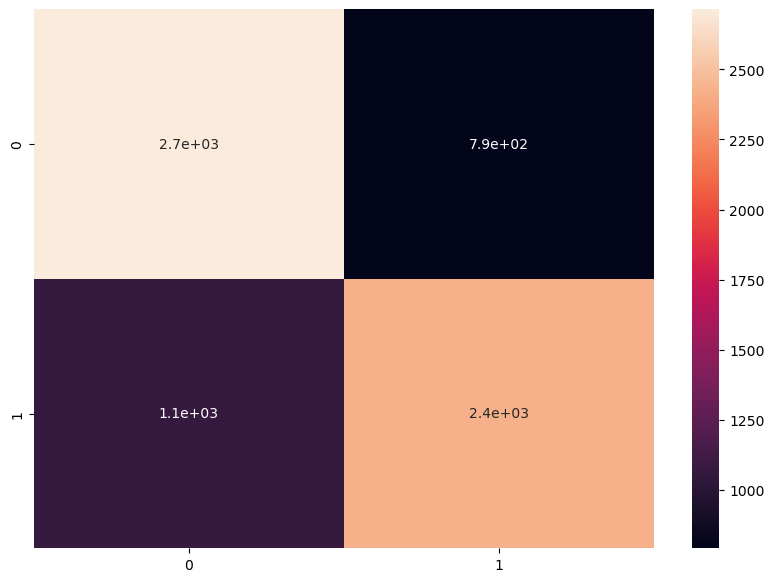

In [125]:
xgb2_cm = confusion_matrix(y_test, pred_vals)
plt.figure(figsize=(10, 7))
sns.heatmap(xgb2_cm, annot=True)

In [126]:
xgb2.delete_endpoint()

INFO:sagemaker:Deleting endpoint configuration with name: xgboost-2023-08-21-02-01-15-832
INFO:sagemaker:Deleting endpoint with name: xgboost-2023-08-21-02-01-15-832
